In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('heart.csv', sep=',')
x = df.iloc[:,0:13].values
y = df.iloc[:,13].values
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle = True)

El vector positivo es:
 [5.32542373e+01 5.00000000e-01 1.36440678e+00 1.28991525e+02
 2.45398305e+02 1.27118644e-01 5.67796610e-01 1.58203390e+02
 1.52542373e-01 5.94915254e-01 1.60169492e+00 3.13559322e-01
 2.10169492e+00]
El vector negativo es:
 [5.61063830e+01 8.29787234e-01 4.68085106e-01 1.34468085e+02
 2.50989362e+02 2.02127660e-01 5.21276596e-01 1.39085106e+02
 5.85106383e-01 1.70638298e+00 1.18085106e+00 1.19148936e+00
 2.48936170e+00]
El vector c es:
 [5.46803101e+01 6.64893617e-01 9.16245943e-01 1.31729805e+02
 2.48193833e+02 1.64623152e-01 5.44536603e-01 1.48644248e+02
 3.68824378e-01 1.15064912e+00 1.39127299e+00 7.52524342e-01
 2.29552831e+00]
La magnitud es:
 322.565971485979
[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 0, 1, 0, 1, 1,

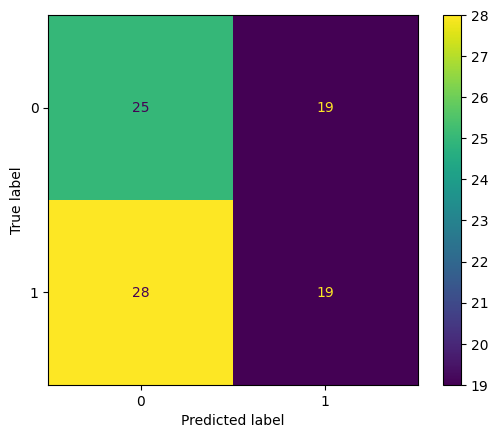

In [3]:
def svm(X_train,y_train,X_test,y_test):
  sumaResCpos = []
  prediccion = []
  # Obtener los índices de los elementos 0
  indices_0 = np.where(y_train == 0)[0]

  # Obtener los índices de los elementos 1
  indices_1 = np.where(y_train == 1)[0]

  Cpos = X_train[indices_1]
  Cneg = X_train[indices_0]
  #print("Conjunto C+:\n",Cpos)
  #print("Conjunto C-:\n",Cneg)

  #Calculos para obtener el valor del vector C
  Cpos_np = np.array(Cpos)
  sumaPos= np.sum(Cpos, axis = 0)
  #print("La suma positiva es:\n",sumaPos)
  Cpos_vector = sumaPos/len(Cpos)
  print("El vector positivo es:\n",Cpos_vector)

  sumaNeg= np.sum(Cneg, axis = 0)
  #print("La suma negativa es:\n",sumaNeg)
  Cneg_vector = sumaNeg/len(Cneg)
  print("El vector negativo es:\n",Cneg_vector)

  C = (Cneg_vector + Cpos_vector)/ 2
  print("El vector c es:\n",C)

  #Calculos para obtener la magnitud
  Cal2 = np.square(C)
  cal2Suma = np.sum(Cal2)
  magnitud = np.sqrt(cal2Suma)
  print("La magnitud es:\n",magnitud)

  #Creando la prediccion de las clases
  for i in range(len(X_test)):
    multiProy = X_test[i]*C
    proyeccion = np.sum(multiProy)/magnitud
    #print(f"La proyeccion en la posicion {i} es:",proyeccion)
    if proyeccion < magnitud:
      #print("La clase será negativa(0)")
      prediccion.append(0)
    elif proyeccion > magnitud:
      #print("La clase será positiva(1)")
      prediccion.append(1)
    else:
      print("No existe la clase")
  print(prediccion)

  cm = confusion_matrix(y_test,prediccion)
  print(prediccion)
  print(classification_report(y_test,prediccion))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
    


svm(X_train,y_train,X_test,y_test)